In [89]:
#importa as bibliotecas necessárias, a documentação do VAR está em http://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
cf.go_offline()



**1) Importe para o R os dados do arquivo “dados_01.csv” e converta as variáveis acima
para séries de tempo usando o comando “ts”. **

com os comandos abaixo importamos o arquivo excel e convertemos o índice do dataframe em uma série de períodos mensais.

In [96]:
#dados importados e dispostos como time-series
data = pd.read_csv('dados_01.csv',sep=';', decimal=',', skiprows=1,names=['DATA', 'SELIC','UTCAP','INF','EXPINF'], index_col=0) #le a planilha
data.index = data.index.map(lambda i: pd.Period(year=int(i), month=(i % 1 * 100), freq='M').to_timestamp()) #converte o indice em períodos mensais
data.head() #exibe os 5 primeiros valores


,SELIC,UTCAP,INF,EXPINF
2002-12-01,25.0,80.4,2.25,11.72
2003-01-01,25.5,80.2,1.57,11.07
2003-02-01,26.5,79.7,1.23,9.90
2003-03-01,26.5,79.7,0.97,9.18
2003-04-01,26.5,79.9,0.61,8.23


** 2)Gere gráficos de cada série. Comente sobre a possível estacionariedade dos
respectivos PGD’s. **

In [97]:
data.iplot(subplots=True, subplot_titles=list(data.columns), title='Dataset para este exercício.')

das quatro varíaveis, a única que demonstra uma possível estacionariedade para o período tode é INF.

**3) Estime um modelo VAR(1) para essas variáveis. Verifique se o VAR estimado é
estacionário. A partir do VAR estimado:**

In [98]:
#criamos um modelo VAR(1) a partir dos dados e exibimos o resultado da regressão
model= VAR(data)
results = model.fit(maxlags=1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Sep, 2017
Time:                     14:48:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.96690
Nobs:                     173.000    HQIC:                  -9.18355
Log likelihood:          -154.735    FPE:                8.85996e-05
AIC:                     -9.33145    Det(Omega_mle):     7.90563e-05
--------------------------------------------------------------------
Results for equation SELIC
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -6.440124         1.463968           -4.399           0.000
L1.SELIC          0.962225         0.008688          110.759           0.000
L1.UTCAP          0.072478         0.017159            4.224           0.000

**a. Realize previsões de todas as variáveis 12 passos à frente.**


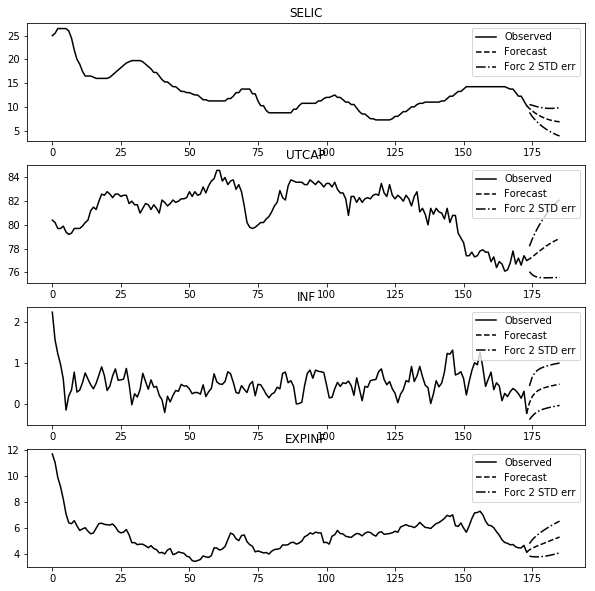

In [143]:
results.plot_forecast(12)

**b. Calcule as FRI’s do modelo por meio do método da decomposição de Cholesky**

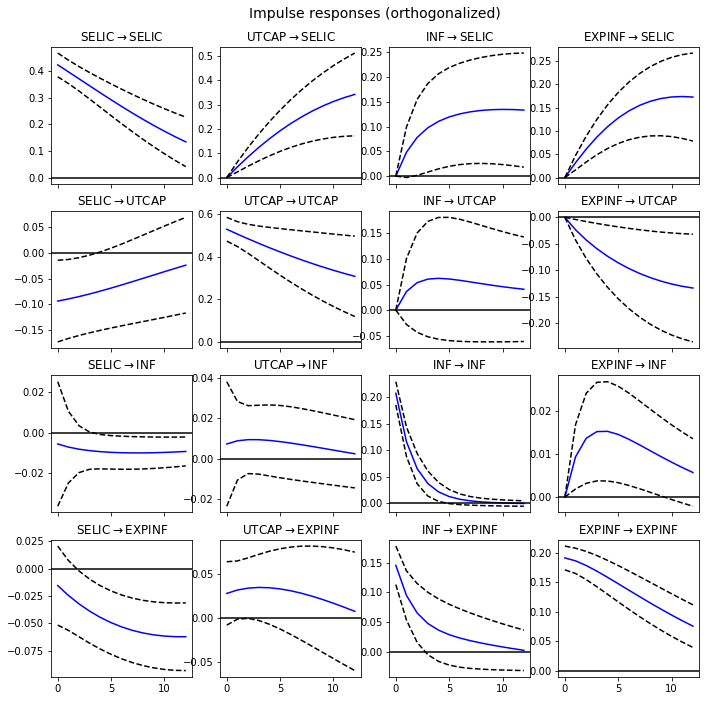

In [121]:
ifr = results.irf(12)
ifr.plot(orth=True)

**c. Teste a existência de causalidade de Granger entre INF e EXPINF (nos dois sentidos).**

In [139]:
print('************ Teste para EXPINF Granger-cause INF: ************\n')
results.test_causality('INF','EXPINF')



print('\n***************** Teste  no sentido oposto: *****************\n')
results.test_causality('EXPINF','INF')

print('') #omite saída desta célula

************ Teste para EXPINF Granger-cause INF: ************

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         6.169247         3.855334            0.013  (1, 672)
H_0: ['EXPINF'] do not Granger-cause INF
Conclusion: reject H_0 at 5.00% significance level

***************** Teste  no sentido oposto: *****************

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         7.747817         3.855334            0.006  (1, 672)
H_0: ['INF'] do not Granger-cause EXPINF
Conclusion: reject H_0 at 5.00% significance level



**4) Estime agora um modelo VAR(2) para as mesmas variáveis. Repita os procedimentos
(a)-(c) dos itens anteriores. Compare os resultados.**

In [145]:
#criamos um modelo VAR(1) a partir dos dados e exibimos o resultado da regressão
model_2= VAR(data)
results_2 = model_2.fit(maxlags=2)
results_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Sep, 2017
Time:                     15:06:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -9.09450
Nobs:                     172.000    HQIC:                  -9.48600
Log likelihood:          -101.448    FPE:                5.81260e-05
AIC:                     -9.75328    Det(Omega_mle):     4.73991e-05
--------------------------------------------------------------------
Results for equation SELIC
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -2.873962         1.319346           -2.178           0.031
L1.SELIC          1.476583         0.066357           22.252           0.000
L1.UTCAP          0.114241         0.052301            2.184           0.030

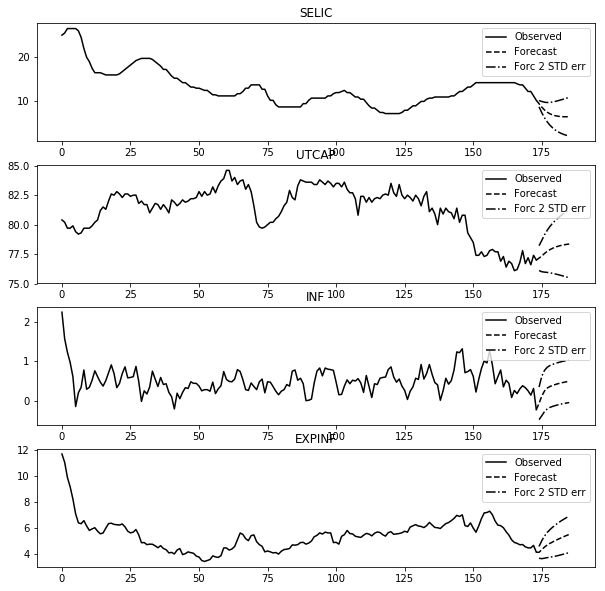

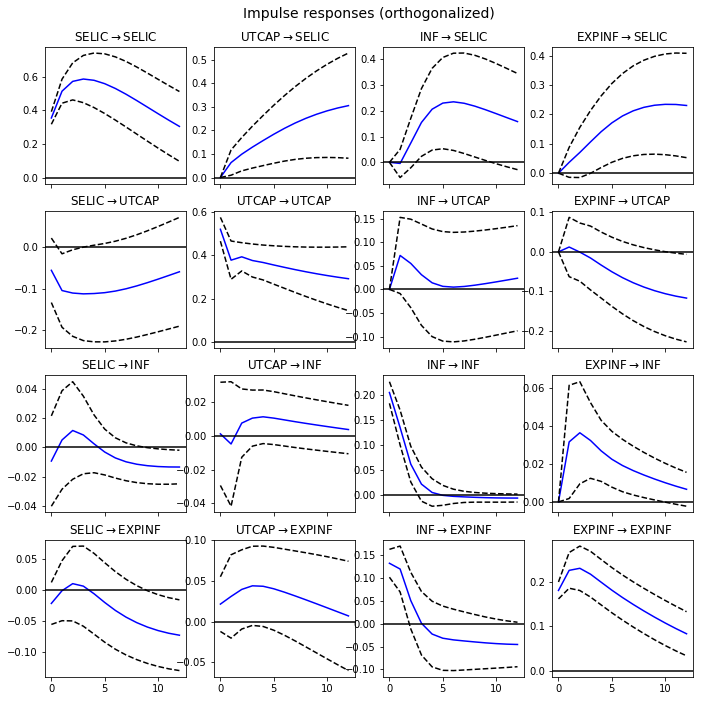

In [148]:
results_2.plot_forecast(12)
ifr_2 = results_2.irf(12)
ifr_2.plot(orth=True)

**ATIVIDADE 2**

Considere o modelo de transmissão monetária da Aula 2, slide 16, com 𝜆 = 0.5, 𝜌 = 3, 𝛾 =
−0.5, 𝑖∗ = 4, 𝜋∗ = 4, 𝜎1
2 = 1, 𝜎2
2 = 1, 𝜎12
2 = 0.5.
<br>
1. Gere 1000 amostras de tamanho 200 dos choques estruturais, da inflação e do hiato do
produto. Para cada amostra, estime as seguintes equações:
𝜋𝑡 = 𝛽0 + 𝛽1𝑦𝑡 + 𝛽2𝜋𝑡−1 + 𝜀𝑡 (1) <br>
𝜋𝑡 = 𝛽0 + 𝛽1𝑦𝑡−1 + 𝛽2𝜋𝑡−1 + 𝜀𝑡 (2) <br>

In [261]:
gamma = 0.5
ro = 3
delta  = -0.5
i_star = 4
pi_star = 4
var_1 = 1
var_2 = 1
var_12 = 0.5

sigma = [[var_1**2, var_12*var_1*var_2],[0,var_2**2]]

pi = lambda y, pi_1, u1 : gamma*y+pi_1+u1
y = lambda pi_1, u2: delta*(i_star - ro * pi_star) + delta * (ro - 1) * pi_1 + u2

y0 = y(pi_star,0)
sim_data = []

for i in range (1000):
    sim_data = (i,0,0,0,y0,pi(y0,pi_star,0))
    for j in range(1,200):
        u1,u2 = pd.np.random.multivariate_normal([0,0], sigma)
        yt = y(sim_data[-1][2],u2)
        pit = pi(yt,sim_data[-1][3],u1)
        sim_data.append((i,j,u1,u2,yt,pit))
    


TypeError: 'float' object is not subscriptable

In [258]:
pd.DataFrame(sim_data, columns=["s#",'r#','u1','u2','Y','PI']).iplot(kind='hist', subplots=True)

In [247]:
sim_data = pd.DataFrame([pd.np.random.multivariate_normal([0,0], sigma) for x in range(1000)], columns=['u1','u2'])

y0 = y(pi_star,0)
pi0 = pi(y0,pi_star,0)
sim_data.loc[0,'pi'] = pi0
sim_data.loc[0,'y'] = y0

for i,r in sim_data.iterrows():
    print(y(r))

u1   -0.870224
u2   -0.073042
pi    4.000000
y     0.000000
Name: 0, dtype: float64
u1   -0.152072
u2   -1.267730
pi         NaN
y          NaN
Name: 1, dtype: float64
u1    0.604592
u2    0.324693
pi         NaN
y          NaN
Name: 2, dtype: float64
u1   -1.882687
u2   -2.087696
pi         NaN
y          NaN
Name: 3, dtype: float64
u1   -0.897919
u2    1.812654
pi         NaN
y          NaN
Name: 4, dtype: float64
u1   -0.169659
u2   -1.464543
pi         NaN
y          NaN
Name: 5, dtype: float64
u1    0.875526
u2    0.221187
pi         NaN
y          NaN
Name: 6, dtype: float64
u1    0.216652
u2    0.661418
pi         NaN
y          NaN
Name: 7, dtype: float64
u1   -0.253246
u2    0.010410
pi         NaN
y          NaN
Name: 8, dtype: float64
u1   -0.902080
u2    1.687415
pi         NaN
y          NaN
Name: 9, dtype: float64
u1    1.532419
u2    2.143216
pi         NaN
y          NaN
Name: 10, dtype: float64
u1   -1.308302
u2   -1.710553
pi         NaN
y          NaN
Name: 11, dtype

Name: 223, dtype: float64
u1    1.374153
u2    0.926948
pi         NaN
y          NaN
Name: 224, dtype: float64
u1   -0.093124
u2   -0.922126
pi         NaN
y          NaN
Name: 225, dtype: float64
u1   -0.880109
u2    0.146312
pi         NaN
y          NaN
Name: 226, dtype: float64
u1    0.132362
u2   -1.424191
pi         NaN
y          NaN
Name: 227, dtype: float64
u1    0.116197
u2   -1.231628
pi         NaN
y          NaN
Name: 228, dtype: float64
u1   -0.456074
u2    1.226909
pi         NaN
y          NaN
Name: 229, dtype: float64
u1    1.705553
u2   -1.151017
pi         NaN
y          NaN
Name: 230, dtype: float64
u1   -0.435965
u2   -1.263188
pi         NaN
y          NaN
Name: 231, dtype: float64
u1   -0.683154
u2    0.633592
pi         NaN
y          NaN
Name: 232, dtype: float64
u1    0.030212
u2   -0.618983
pi         NaN
y          NaN
Name: 233, dtype: float64
u1   -0.364234
u2    0.154952
pi         NaN
y          NaN
Name: 234, dtype: float64
u1    0.128300
u2   -0.00258

Name: 376, dtype: float64
u1    0.309532
u2   -0.333080
pi         NaN
y          NaN
Name: 377, dtype: float64
u1   -0.714973
u2    1.691607
pi         NaN
y          NaN
Name: 378, dtype: float64
u1    0.152902
u2    0.303647
pi         NaN
y          NaN
Name: 379, dtype: float64
u1   -0.882493
u2   -1.007365
pi         NaN
y          NaN
Name: 380, dtype: float64
u1    0.030842
u2   -0.263000
pi         NaN
y          NaN
Name: 381, dtype: float64
u1    0.674105
u2    1.247980
pi         NaN
y          NaN
Name: 382, dtype: float64
u1    0.281783
u2    0.010609
pi         NaN
y          NaN
Name: 383, dtype: float64
u1   -0.866885
u2   -1.396382
pi         NaN
y          NaN
Name: 384, dtype: float64
u1   -0.248383
u2   -1.827920
pi         NaN
y          NaN
Name: 385, dtype: float64
u1    0.368931
u2   -1.892833
pi         NaN
y          NaN
Name: 386, dtype: float64
u1    1.623909
u2    1.156363
pi         NaN
y          NaN
Name: 387, dtype: float64
u1   -0.541433
u2    1.09726

Name: 515, dtype: float64
u1   -2.507710
u2   -1.240413
pi         NaN
y          NaN
Name: 516, dtype: float64
u1   -0.868242
u2    0.155023
pi         NaN
y          NaN
Name: 517, dtype: float64
u1   -1.611362
u2    0.083577
pi         NaN
y          NaN
Name: 518, dtype: float64
u1   -1.606463
u2    0.641943
pi         NaN
y          NaN
Name: 519, dtype: float64
u1    0.831519
u2   -1.097122
pi         NaN
y          NaN
Name: 520, dtype: float64
u1   -0.503444
u2   -0.096016
pi         NaN
y          NaN
Name: 521, dtype: float64
u1    0.007444
u2   -1.950438
pi         NaN
y          NaN
Name: 522, dtype: float64
u1    0.358611
u2    0.854864
pi         NaN
y          NaN
Name: 523, dtype: float64
u1   -0.302066
u2   -1.139113
pi         NaN
y          NaN
Name: 524, dtype: float64
u1   -0.563288
u2   -1.920398
pi         NaN
y          NaN
Name: 525, dtype: float64
u1   -1.042908
u2   -0.350888
pi         NaN
y          NaN
Name: 526, dtype: float64
u1    0.866946
u2    0.42340

Name: 762, dtype: float64
u1   -0.615889
u2   -2.211028
pi         NaN
y          NaN
Name: 763, dtype: float64
u1    0.079310
u2   -0.595358
pi         NaN
y          NaN
Name: 764, dtype: float64
u1    1.825217
u2    0.923221
pi         NaN
y          NaN
Name: 765, dtype: float64
u1   -1.371053
u2   -0.327821
pi         NaN
y          NaN
Name: 766, dtype: float64
u1    0.582691
u2    0.505374
pi         NaN
y          NaN
Name: 767, dtype: float64
u1   -0.682642
u2    0.911641
pi         NaN
y          NaN
Name: 768, dtype: float64
u1    0.491723
u2   -1.244648
pi         NaN
y          NaN
Name: 769, dtype: float64
u1    1.331248
u2   -0.049346
pi         NaN
y          NaN
Name: 770, dtype: float64
u1   -0.135163
u2   -1.051029
pi         NaN
y          NaN
Name: 771, dtype: float64
u1    0.119171
u2    0.419573
pi         NaN
y          NaN
Name: 772, dtype: float64
u1    3.023201
u2    0.141461
pi         NaN
y          NaN
Name: 773, dtype: float64
u1    0.750800
u2   -1.74877

u1    0.050417
u2   -1.553377
pi         NaN
y          NaN
Name: 959, dtype: float64
u1   -0.867079
u2   -1.407214
pi         NaN
y          NaN
Name: 960, dtype: float64
u1    0.495103
u2    0.000506
pi         NaN
y          NaN
Name: 961, dtype: float64
u1   -0.632514
u2   -2.406029
pi         NaN
y          NaN
Name: 962, dtype: float64
u1    0.744698
u2   -0.099115
pi         NaN
y          NaN
Name: 963, dtype: float64
u1    0.711244
u2    0.836924
pi         NaN
y          NaN
Name: 964, dtype: float64
u1   -1.388647
u2   -0.698602
pi         NaN
y          NaN
Name: 965, dtype: float64
u1   -0.717485
u2    1.152226
pi         NaN
y          NaN
Name: 966, dtype: float64
u1    0.366931
u2   -0.367500
pi         NaN
y          NaN
Name: 967, dtype: float64
u1    1.344897
u2    1.247707
pi         NaN
y          NaN
Name: 968, dtype: float64
u1   -0.288398
u2    0.589601
pi         NaN
y          NaN
Name: 969, dtype: float64
u1   -0.743071
u2   -1.829664
pi         NaN
y        

,u1,u2,pi,y,pi_1,y_1
0,-0.297435,1.151909,4.0,0.0,NaN,NaN
1,0.604183,-1.098198,NaN,NaN,4.0,0.0
2,-1.429007,-0.557616,NaN,NaN,NaN,NaN
3,-0.676396,-1.568462,NaN,NaN,NaN,NaN
4,0.010252,-1.080518,NaN,NaN,NaN,NaN
5,-1.632300,-1.124298,NaN,NaN,NaN,NaN
6,0.882928,0.636501,NaN,NaN,NaN,NaN
7,0.111970,0.610390,NaN,NaN,NaN,NaN
8,-0.427935,0.877572,NaN,NaN,NaN,NaN
9,2.088297,1.067245,NaN,NaN,NaN,NaN
